In [1]:
## import some modules between which also our HamFit_py

import HammerFit
from iminuit import Minuit
import numpy as np

/home/mcolonna/.conda/envs/env_2024_11_25/etc/cling/std.modulemap:257:29: warning: unknown attribute 'optional' [-Wignored-attributes]
  module "memory_resource" [optional] {
                            ^
/home/mcolonna/.conda/envs/env_2024_11_25/etc/cling/std.modulemap:447:27: warning: unknown attribute 'optional' [-Wignored-attributes]
  module "bits/chrono.h" [optional] {
                          ^
/home/mcolonna/.conda/envs/env_2024_11_25/etc/cling/std.modulemap:531:41: warning: unknown attribute 'optional' [-Wignored-attributes]
  explicit module "bits_ranges_base_h" [optional] {
                                        ^
/home/mcolonna/.conda/envs/env_2024_11_25/etc/cling/std.modulemap:538:32: warning: unknown attribute 'optional' [-Wignored-attributes]
  module "bits/ranges_util.h" [optional] {
                               ^
/home/mcolonna/.conda/envs/env_2024_11_25/etc/cling/std.modulemap:559:40: warning: unknown attribute 'optional' [-Wignored-attributes]
  module "bits/uses

Welcome to JupyROOT 6.28/04


In [2]:
# here we make use of the Reader class
# that makes use of the classes in the module and gives you a fitter object
# that you can than use to interface any kind of fitting interface

reader = HammerFit.Reader("Config_scan.json")
fitter = reader.createFitter()

/home/mcolonna/.conda/envs/env_2024_11_25/lib/python3.10/site-packages/HammerFit/HammerFit.py:604: RuntimeWarning: invalid value encountered in divide
  ratio = contributions[0][i] / total_contribution
/home/mcolonna/.conda/envs/env_2024_11_25/lib/python3.10/site-packages/HammerFit/HammerFit.py:605: RuntimeWarning: invalid value encountered in divide
  ratio_err = np.sqrt(contributions[0][i]) / total_contribution


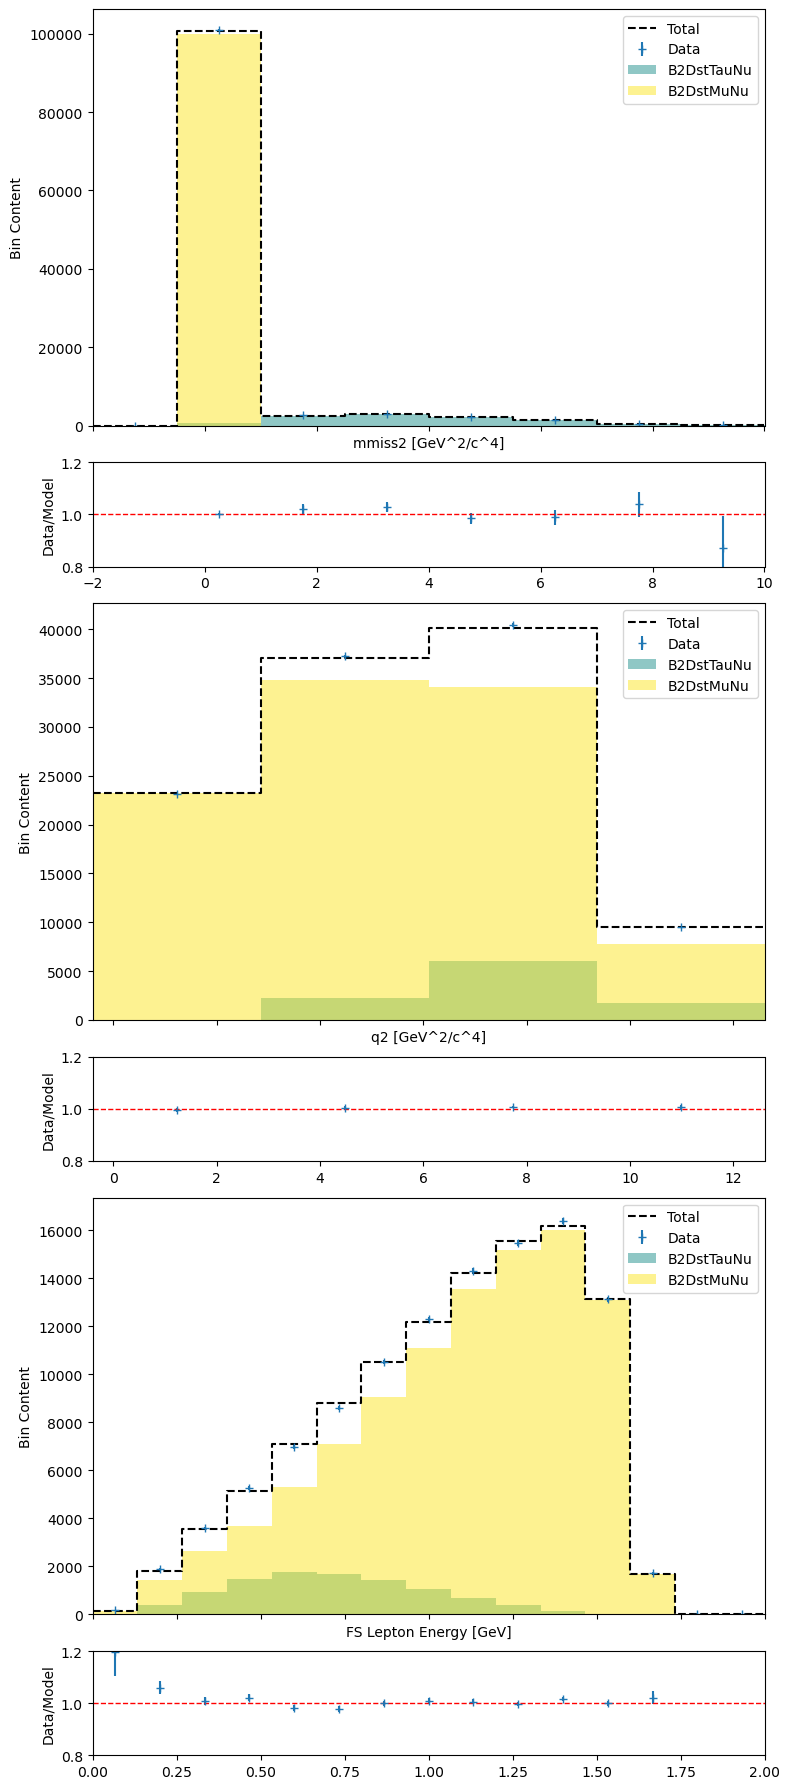

In [3]:
# from the fitter object you can change the parameters and see how it change
# the plot method compares the template with a toy that is produced according to the parameters in the .config file

params = {"SM" : 1., "Re_S_qLlL" : -0., "Im_S_qLlL" : 0. , "Re_S_qRlL" : 0., "Im_S_qRlL" : 0.,  "Re_V_qLlL" : 0., "Im_V_qLlL" : 0. , "Re_V_qRlL" : 0., "Im_V_qRlL" : 0., "Re_T_qLlL" : 0.0, "Im_T_qLlL" : +0., "delta_RhoSq" : 0.0, "delta_cSt" : 0.0, "delta_chi21" : 0., "delta_chi2p" : 0., "delta_chi3p" : 0., "delta_eta1" : 0., "delta_etap" : 0., "delta_phi1p" : 0., "delta_beta21" : 0., "delta_beta3p" : 0.,"lumi" : 1.}
fitter.upload_data_toy(**params)
fitter.plot(**params)

In [4]:
# the fitter object is very general:
# you can fit into basically any fitting interface, for example let's do a scan on the
# scalar LL wilson coefficient keeping all the d.o.f except the SM fixed

# we just have to write a couple of simple functions and it is done!

# in the future we also aim to include this already in the HamF module

def fit_FF_fixed(fitter,**initial_guess):
    def nll_wrapped(SM, Re_S_qLlL, Im_S_qLlL, Re_S_qRlL, Im_S_qRlL, Re_V_qLlL, Im_V_qLlL, Re_V_qRlL, Im_V_qRlL, Re_T_qLlL, Im_T_qLlL, delta_RhoSq,delta_cSt,delta_chi21,delta_chi2p,delta_chi3p,delta_eta1,delta_etap,delta_phi1p,delta_beta21,delta_beta3p,lumi):
        return fitter.negative_log_likelihood(SM=SM, Re_S_qLlL=Re_S_qLlL, Im_S_qLlL=Im_S_qLlL, Re_S_qRlL=Re_S_qRlL, Im_S_qRlL=Im_S_qRlL, Re_V_qLlL=Re_V_qLlL, Im_V_qLlL=Im_V_qLlL, Re_V_qRlL=Re_V_qRlL, Im_V_qRlL=Im_V_qRlL, Re_T_qLlL=Re_T_qLlL, Im_T_qLlL=Im_T_qLlL,delta_RhoSq=delta_RhoSq,delta_cSt=delta_cSt,delta_chi21=delta_chi21,delta_chi2p=delta_chi2p,delta_chi3p=delta_chi3p,delta_eta1=delta_eta1,delta_etap=delta_etap,delta_phi1p=delta_phi1p,delta_beta21=delta_beta21,delta_beta3p=delta_beta3p,lumi=lumi)
    m = Minuit(nll_wrapped, **initial_guess)

    m.limits['SM'] = (0.8,1.2)

    m.limits['Re_S_qLlL'] = (-1,1)
    m.limits['Re_S_qRlL'] = (0.,0.)
    m.limits['Re_V_qLlL'] = (0.,0.)
    m.limits['Re_V_qRlL'] = (0.,0.)
    m.limits['Re_T_qLlL'] = (0.,0.)
    m.limits['Im_S_qLlL'] = (-1,1)
    m.limits['Im_S_qRlL'] = (0.,0.)
    m.limits['Im_V_qLlL'] = (-0.,0.)
    m.limits['Im_V_qRlL'] = (0.,0.)
    m.limits['Im_T_qLlL'] = (0.,0.)

    m.limits['delta_RhoSq'] = (0.,0.) 
    m.limits['delta_cSt'] = (0.,0.) 
    m.limits['delta_chi21'] = (0.,0.) 
    m.limits['delta_chi2p'] = (0.,0.) 
    m.limits['delta_chi3p'] = (0.,0.) 
    m.limits['delta_eta1'] = (0.,0.) 
    m.limits['delta_etap'] = (0.,0.) 
    m.limits['delta_phi1p'] = (0.,0.) 
    m.limits['delta_beta21'] = (0.,0.) 
    m.limits['delta_beta3p'] = (0.,0.) 

    m.limits['lumi'] = (1.,1.)
    m.migrad()
    m.errordef = Minuit.LIKELIHOOD
    values = []
    errors = []
    for param in m.parameters:
            value = m.values[param]
            values.append(value)
            error = m.errors[param]
            errors.append(error)
            print(f"{param}: {value:.4f} ± {error:.4f}")
    return m.fval, m.values, m.errors

def fit_scan_FF_fixed(fitter,val1,val2,**initial_guess):
    
    def nll_wrapped(SM, Re_S_qLlL, Im_S_qLlL, Re_S_qRlL, Im_S_qRlL, Re_V_qLlL, Im_V_qLlL, Re_V_qRlL, Im_V_qRlL, Re_T_qLlL, Im_T_qLlL, delta_RhoSq,delta_cSt,delta_chi21,delta_chi2p,delta_chi3p,delta_eta1,delta_etap,delta_phi1p,delta_beta21,delta_beta3p,lumi):
        return fitter.negative_log_likelihood(SM=SM, Re_S_qLlL=Re_S_qLlL, Im_S_qLlL=Im_S_qLlL, Re_S_qRlL=Re_S_qRlL, Im_S_qRlL=Im_S_qRlL, Re_V_qLlL=Re_V_qLlL, Im_V_qLlL=Im_V_qLlL, Re_V_qRlL=Re_V_qRlL, Im_V_qRlL=Im_V_qRlL, Re_T_qLlL=Re_T_qLlL, Im_T_qLlL=Im_T_qLlL,delta_RhoSq=delta_RhoSq,delta_cSt=delta_cSt,delta_chi21=delta_chi21,delta_chi2p=delta_chi2p,delta_chi3p=delta_chi3p,delta_eta1=delta_eta1,delta_etap=delta_etap,delta_phi1p=delta_phi1p,delta_beta21=delta_beta21,delta_beta3p=delta_beta3p,lumi=lumi)
    m = Minuit(nll_wrapped, **initial_guess)

    m.limits['SM'] = (0.8,1.2)

    m.limits['Re_S_qLlL'] = (val1,val1)
    m.limits['Re_S_qRlL'] = (0.,0.)
    m.limits['Re_V_qLlL'] = (0.,0.)
    m.limits['Re_V_qRlL'] = (0.,0.)
    m.limits['Re_T_qLlL'] = (0.,0.)
    m.limits['Im_S_qLlL'] = (val2,val2)
    m.limits['Im_S_qRlL'] = (0.,0.)
    m.limits['Im_V_qLlL'] = (-0.,0.)
    m.limits['Im_V_qRlL'] = (0.,0.)
    m.limits['Im_T_qLlL'] = (0.,0.)

    m.limits['delta_RhoSq'] = (0.,0.) 
    m.limits['delta_cSt'] = (0.,0.) 
    m.limits['delta_chi21'] = (0.,0.) 
    m.limits['delta_chi2p'] = (0.,0.) 
    m.limits['delta_chi3p'] = (0.,0.) 
    m.limits['delta_eta1'] = (0.,0.) 
    m.limits['delta_etap'] = (0.,0.) 
    m.limits['delta_phi1p'] = (0.,0.) 
    m.limits['delta_beta21'] = (0.,0.) 
    m.limits['delta_beta3p'] = (0.,0.) 

    m.limits['lumi'] = (1.,1.)
    m.migrad()
    return m.fval

# if you want to save time decrease the value of Granularity (Granularity 30 takes ~30 minutes)
# or if you want to have a better resolution increase it but the scan might take some time
def scan(fitter):
    initial_guess_ff = {
                'SM': 1.0,
                'Re_S_qLlL': 0.0,
                'Im_S_qLlL': 0.0,
                'Re_S_qRlL': 0.0,
                'Im_S_qRlL': 0.0,
                'Re_V_qLlL': 0.0,
                'Im_V_qLlL': 0.0,
                'Re_V_qRlL': 0.0,
                'Im_V_qRlL': 0.0,
                'Re_T_qLlL': 0.0,
                'Im_T_qLlL': 0.0,
                "delta_RhoSq" : 0.,
                "delta_cSt" : 0.0,
                "delta_chi21" : 0.,
                "delta_chi2p" : 0.,
                "delta_chi3p" : 0.,
                "delta_eta1" : 0.,
                "delta_etap" : 0.,
                "delta_phi1p" : 0.,
                "delta_beta21" : 0.,
                "delta_beta3p" : 0.,
                'lumi': 1.
            }
    nll_min, vals, errs = fit_FF_fixed(fitter,**initial_guess_ff)
    Granularity = 20
    Re_Grid = np.linspace(vals['Re_S_qLlL']-3*errs['Re_S_qLlL'],vals['Re_S_qLlL']+3*errs['Re_S_qLlL'],Granularity)
    Im_Grid = np.linspace(vals['Im_S_qLlL']-3*errs['Im_S_qLlL'],vals['Im_S_qLlL']+3*errs['Im_S_qLlL'],Granularity)
    Chi_Grid = np.zeros((Granularity, Granularity))
    for i in range(Granularity):
        print(f"Scanning the row {i+1}/{Granularity}")
        for j in range(Granularity):
            initial_guess = {
                'SM': 1.0,
                'Re_S_qLlL': Re_Grid[i],
                'Im_S_qLlL': Im_Grid[j],
                'Re_S_qRlL': 0.0,
                'Im_S_qRlL': 0.0,
                'Re_V_qLlL': 0.0,
                'Im_V_qLlL': 0.0,
                'Re_V_qRlL': 0.0,
                'Im_V_qRlL': 0.0,
                'Re_T_qLlL': 0.0,
                'Im_T_qLlL': 0.0,
                "delta_RhoSq" : 0.,
                "delta_cSt" : 0.0,
                "delta_chi21" : 0.,
                "delta_chi2p" : 0.,
                "delta_chi3p" : 0.,
                "delta_eta1" : 0.,
                "delta_etap" : 0.,
                "delta_phi1p" : 0.,
                "delta_beta21" : 0.,
                "delta_beta3p" : 0.,
                'lumi': 1.
            }
            Chi_Grid[i][Granularity-(j+1)]=fit_scan_FF_fixed(fitter,Re_Grid[i],Im_Grid[j],**initial_guess)-nll_min
    return Chi_Grid, vals, errs

In [5]:
%time Grid_mu, vals, errs = scan(fitter)

SM: 1.0014 ± 0.0016
Re_S_qLlL: -0.0843 ± 0.0885
Im_S_qLlL: -0.0605 ± 0.2721
Re_S_qRlL: 0.0000 ± 0.1000
Im_S_qRlL: 0.0000 ± 0.1000
Re_V_qLlL: 0.0000 ± 0.1000
Im_V_qLlL: 0.0000 ± 0.1000
Re_V_qRlL: 0.0000 ± 0.1000
Im_V_qRlL: 0.0000 ± 0.1000
Re_T_qLlL: 0.0000 ± 0.1000
Im_T_qLlL: 0.0000 ± 0.1000
delta_RhoSq: 0.0000 ± 0.1000
delta_cSt: 0.0000 ± 0.1000
delta_chi21: 0.0000 ± 0.1000
delta_chi2p: 0.0000 ± 0.1000
delta_chi3p: 0.0000 ± 0.1000
delta_eta1: 0.0000 ± 0.1000
delta_etap: 0.0000 ± 0.1000
delta_phi1p: 0.0000 ± 0.1000
delta_beta21: 0.0000 ± 0.1000
delta_beta3p: 0.0000 ± 0.1000
lumi: 1.0000 ± 0.0100
Scanning the row 1/20
Scanning the row 2/20
Scanning the row 3/20
Scanning the row 4/20
Scanning the row 5/20
Scanning the row 6/20
Scanning the row 7/20
Scanning the row 8/20
Scanning the row 9/20
Scanning the row 10/20
Scanning the row 11/20
Scanning the row 12/20
Scanning the row 13/20
Scanning the row 14/20
Scanning the row 15/20
Scanning the row 16/20
Scanning the row 17/20
Scanning the row

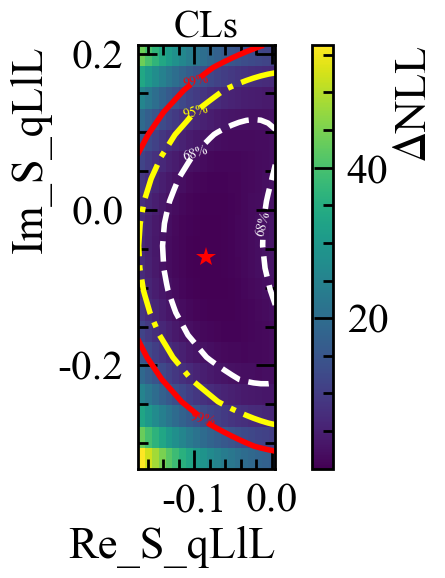

In [8]:
import matplotlib.pyplot as plt
import mplhep as hep
plt.style.use([hep.style.LHCb1])

Grid_mu_mod = np.copy(Grid_mu).transpose()

confidence_levels = [2.30, 6.18, 11.83]  # 1σ, 2σ, 3σ

plt.figure(figsize=(8, 6))
plt.imshow(Grid_mu_mod, cmap='viridis', interpolation='nearest', 
           extent=[vals['Re_S_qLlL'] - errs['Re_S_qLlL'], 
                   vals['Re_S_qLlL'] + errs['Re_S_qLlL'], 
                   vals['Im_S_qLlL'] - errs['Im_S_qLlL'], 
                   vals['Im_S_qLlL'] + errs['Im_S_qLlL']])
plt.colorbar(label=r'$\Delta$NLL')

x = np.linspace(vals['Re_S_qLlL'] - errs['Re_S_qLlL'], vals['Re_S_qLlL'] + errs['Re_S_qLlL'], Grid_mu_mod.shape[1])
y = np.linspace(vals['Im_S_qLlL'] + errs['Im_S_qLlL'], vals['Im_S_qLlL'] - errs['Im_S_qLlL'], Grid_mu_mod.shape[0])
X, Y = np.meshgrid(x, y)
contour = plt.contour(X, Y, Grid_mu_mod, levels=confidence_levels, colors=['white', 'yellow', 'red'], linestyles=['--', '-.', '-'])
plt.clabel(contour, inline=1, fontsize=10, fmt={confidence_levels[0]: '68%', confidence_levels[1]: '95%', confidence_levels[2]: '99%'})

plt.plot(vals['Re_S_qLlL'], vals['Im_S_qLlL'], marker='*', color='red', markersize=15, label='Best Fit')

plt.title('CLs')
plt.xlabel('Re_S_qLlL')
plt.ylabel('Im_S_qLlL')
plt.grid(False)

plt.show()
